In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Analysing data
#Importing data and basic libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

#Importing visualization and plotting libraries
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import theano
import tensorflow
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix ,classification_report
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#loading the dataset for the training
data = pd.read_csv('/content/gdrive/MyDrive/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Exploratory Analysis

In [23]:
#Checking only the top 5 rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Shape of the datset (dataset has 5000 rows and 18 columns)
data.shape

(7043, 21)

In [ ]:
#Checking for the Missing values(There are no missing values in the dataset)
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

## Data Preprocessing

In [ ]:
# Explore Dataset
print('Dimensions:{}'.format(data.shape))
print(data.dtypes)


Dimensions:(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### churn attribute is considered to be the target variable

In [14]:
churning = data['Churn'].value_counts() 
print(type(churning))
churning.head()

<class 'pandas.core.series.Series'>


No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


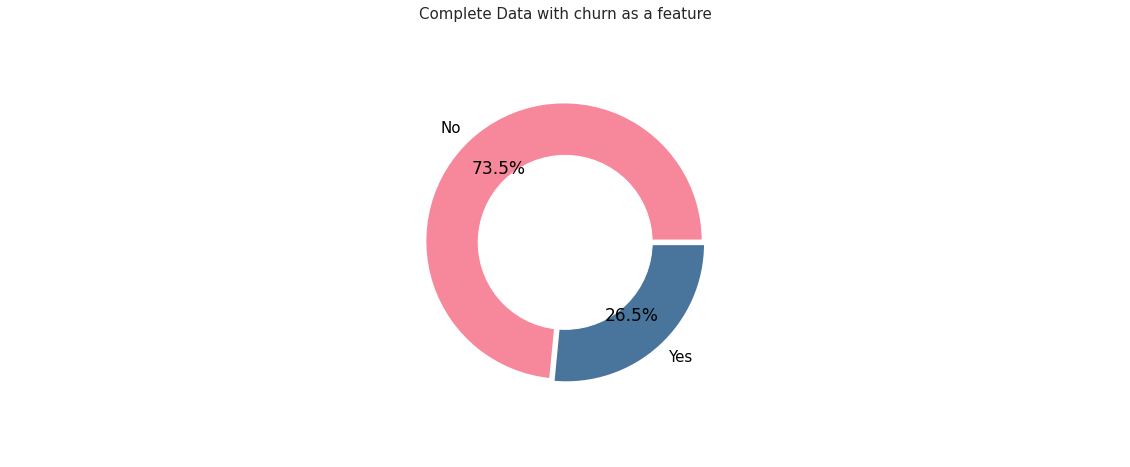

In [15]:
#Pie-plot representing features churn
fig = plt.figure(figsize=(20,8))
plt.title("Complete Data with churn as a feature",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(111)
ax1.axis('equal')
explode = (0.01,)*(len(churning))

wedges, texts, autotexts =  ax1.pie(churning,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['No','Yes'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [16]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
#Statistical description for the data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


No     5174
Yes    1869
Name: Churn, dtype: int64

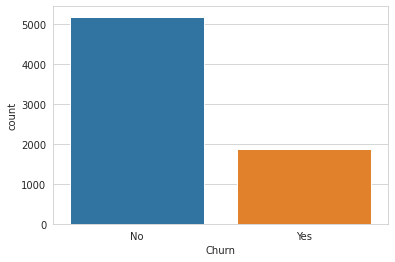

In [18]:
#plotting the graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "Churn", data = data)
data.loc[:, 'Churn'].value_counts()

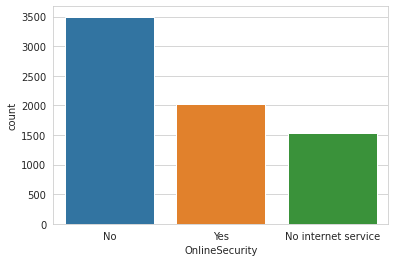

In [22]:
#plotting the graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "OnlineSecurity", data = data)
#data.loc[:, 'OnlineSecurity '].value_counts()

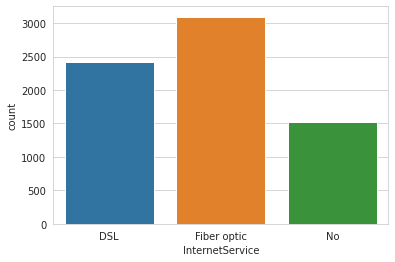

In [24]:
#plotting the graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "InternetService", data = data)
#data.loc[:, 'voicemailplan'].value_counts()

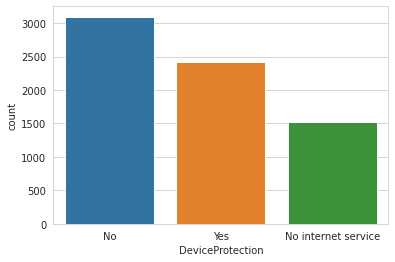

In [28]:
#plotting the graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "DeviceProtection", data = data)
#data.loc[:, 'totalintlcharge'].value_counts()

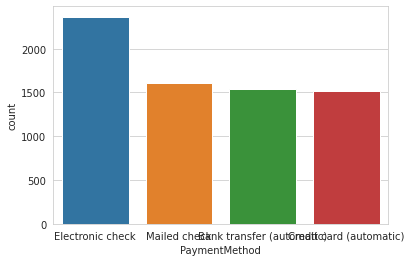

In [31]:
#plotting the graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "PaymentMethod", data = data)
#data.loc[:, 'totalintlcalls'].value_counts()

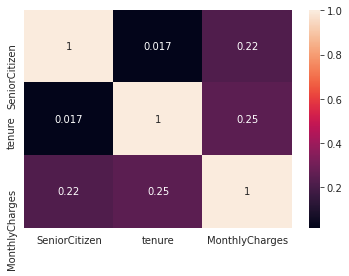

In [32]:
#Correaltion plot before encoding
plt.figure()
Corr=data[data.columns].corr()
sns.heatmap(Corr,annot=True)

In [33]:
# converting the non-numeric data into numeric data.
from sklearn.preprocessing import LabelEncoder
encoded = data.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


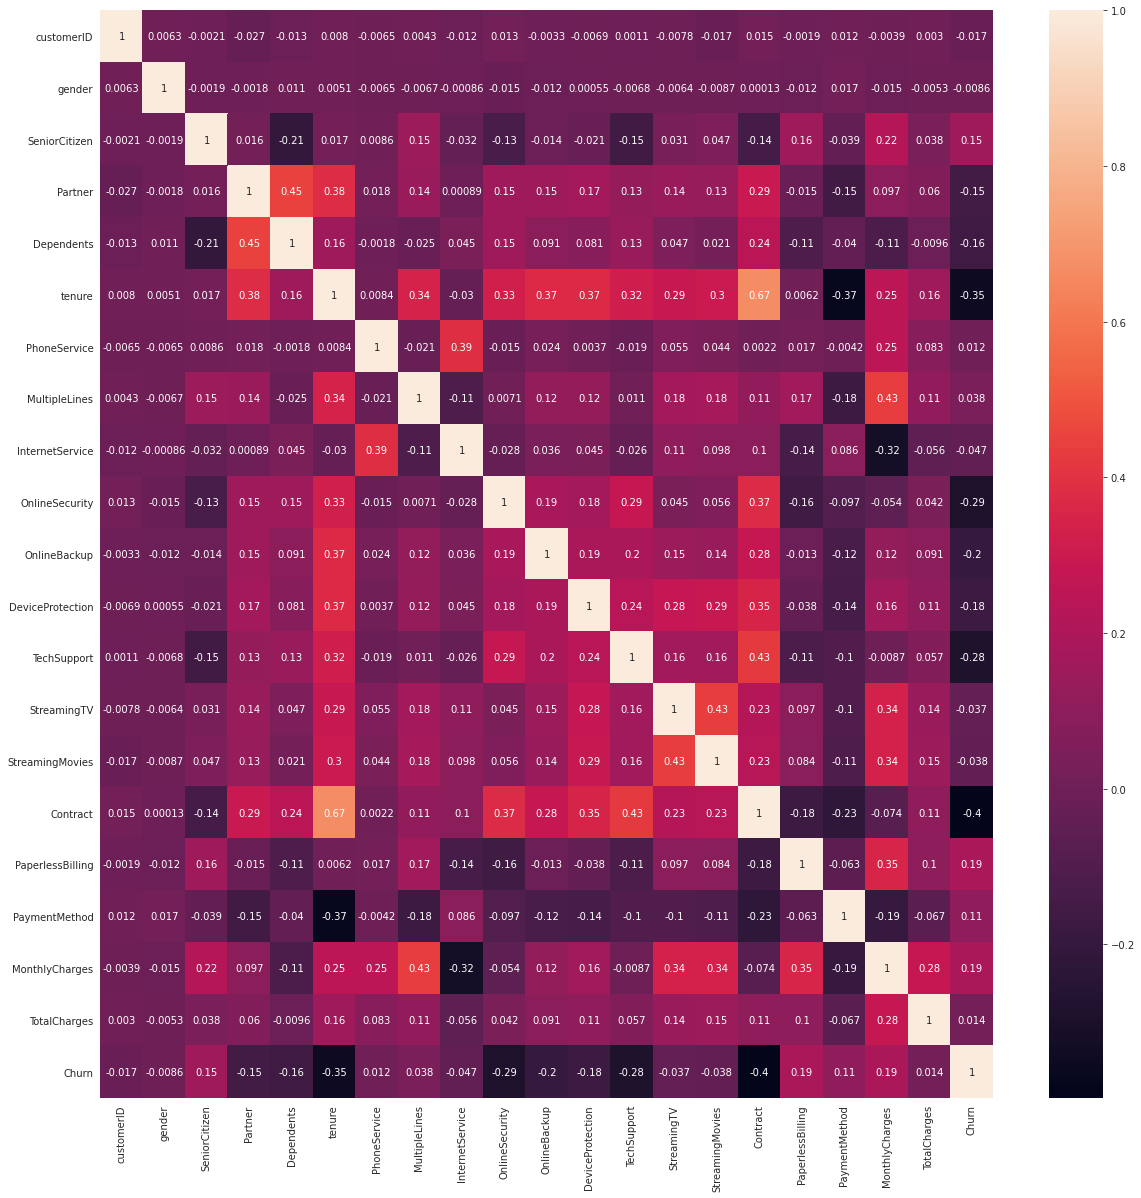

In [34]:
# Correlation after label encoding
plt.figure(figsize =(20,20))
Corr=encoded[encoded.columns].corr()
sns.heatmap(Corr,annot=True)

## Data Splitting into training and testing subset

In [35]:
X = encoded.iloc[:, 1:16]
y = encoded.Churn

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#print length of X_train, X_test, y_train, y_test
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  5634
X_test:  1409
y_train:  5634
y_test:  1409


### Splitting the dataset into 805 and 20% ratio for training and testing data respectively

## 1. Random Forest Tree

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print('Accuracy score (training): {:.3f}'.format(rfr.score(X_train, y_train)))
print('Accuracy score (test): {:.3f}'.format(rfr.score(X_test, y_test)))

Accuracy score (training): 0.802
Accuracy score (test): 0.246


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Accuracy score Random Forest Classifier training set: {:.3f}'.format(rfc.score(X_train, y_train)))
print('Accuracy score Random Forest Classifier test set: {:.3f}'.format(rfc.score(X_test, y_test)))

Accuracy score Random Forest Classifier training set: 0.964
Accuracy score Random Forest Classifier test set: 0.777


In [40]:
y_rfc = rfc.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_rfc))

print('precision_score of Random Forest Classifier: ', precision_score(y_test, y_rfc))

print('recall_score of Random Forest Classifier: ', recall_score(y_test, y_rfc))

print('precision_recall_curve of Random Forest Classifier')
print(precision_recall_curve(y_test, y_rfc))

Confusion Matrix
[[914 118]
 [196 181]]
precision_score of Random Forest Classifier:  0.6053511705685619
recall_score of Random Forest Classifier:  0.48010610079575594
precision_recall_curve of Random Forest Classifier
(array([0.26756565, 0.60535117, 1.        ]), array([1.       , 0.4801061, 0.       ]), array([0, 1]))


## 2. Logistic Regression

In [41]:
  from sklearn.linear_model import LogisticRegression
  from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
#accuracy_score(pred, y_test)

print('Accuracy score (training): {:.3f}'.format(lr.score(X_train, y_train)))
print('Accuracy score (test): {:.3f}'.format(lr.score(X_test, y_test)))

Accuracy score (training): 0.784
Accuracy score (test): 0.784


In [42]:
y_lr = lr.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_lr))

print('precision_score of Random Forest Classifier: ', precision_score(y_test, y_lr))

print('recall_score of Random Forest Classifier: ', recall_score(y_test, y_lr))

print('precision_recall_curve of Random Forest Classifier')
print(precision_recall_curve(y_test, y_lr))

Confusion Matrix
[[920 112]
 [192 185]]
precision_score of Random Forest Classifier:  0.622895622895623
recall_score of Random Forest Classifier:  0.4907161803713528
precision_recall_curve of Random Forest Classifier
(array([0.26756565, 0.62289562, 1.        ]), array([1.        , 0.49071618, 0.        ]), array([0, 1]))


## 3. Classification and Regression Tree (CART)

In [43]:
from sklearn import tree # for decision tree models  
  # Fit the model
cart = tree.DecisionTreeClassifier( )
cart.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
print('Accuracy score (training): {:.3f}'.format(cart.score(X_train, y_train)))
print('Accuracy score (test): {:.3f}'.format(cart.score(X_test, y_test)))

Accuracy score (training): 0.964
Accuracy score (test): 0.735


In [45]:
y_cart = cart.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_cart))

print('precision_score of Random Forest Classifier: ', precision_score(y_test, y_cart))

print('recall_score of Random Forest Classifier: ', recall_score(y_test, y_cart))

print('precision_recall_curve of Random Forest Classifier')
print(precision_recall_curve(y_test, y_cart))

Confusion Matrix
[[843 189]
 [184 193]]
precision_score of Random Forest Classifier:  0.5052356020942408
recall_score of Random Forest Classifier:  0.5119363395225465
precision_recall_curve of Random Forest Classifier
(array([0.26756565, 0.5052356 , 1.        ]), array([1.        , 0.51193634, 0.        ]), array([0, 1]))


## 4. Support Vector Machine

In [46]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
print('Accuracy score (training): {:.3f}'.format(svm.score(X_train, y_train)))
print('Accuracy score (test): {:.3f}'.format(svm.score(X_test, y_test)))

Accuracy score (training): 0.782
Accuracy score (test): 0.785


In [48]:
y_svm = svm.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_svm))

print('precision_score of Random Forest Classifier: ', precision_score(y_test, y_svm))

print('recall_score of Random Forest Classifier: ', recall_score(y_test, y_svm))

print('precision_recall_curve of Random Forest Classifier')
print(precision_recall_curve(y_test, y_svm))

Confusion Matrix
[[929 103]
 [200 177]]
precision_score of Random Forest Classifier:  0.6321428571428571
recall_score of Random Forest Classifier:  0.46949602122015915
precision_recall_curve of Random Forest Classifier
(array([0.26756565, 0.63214286, 1.        ]), array([1.        , 0.46949602, 0.        ]), array([0, 1]))


## 5. Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

print('accuracy of Decision Tree Classifier training set: {:.3f}'.format(classifier.score(X_train,y_train)))
print('accuaracy of Decision Tree Classifier test set: {:.3f}'.format(classifier.score(X_test, y_test)))

accuracy of Decision Tree Classifier training set: 0.964
accuaracy of Decision Tree Classifier test set: 0.744


In [50]:
y_dtc = classifier.predict(X_test)

print('accuracy_score of decesion tree classifier: ', accuracy_score(y_dtc, y_test))
print('confusion_matrix of decision tree classifier')
print(confusion_matrix(y_dtc, y_test))
print('precision_score of decision tree classifier: ', precision_score(y_dtc, y_test))
print('recall_score of decision tree classifier: ', recall_score(y_dtc, y_test))

print('precision_recall_curve of decision tree classifier') 
print(precision_recall_curve(y_dtc, y_test))

accuracy_score of decesion tree classifier:  0.7444996451383961
confusion_matrix of decision tree classifier
[[845 173]
 [187 204]]
precision_score of decision tree classifier:  0.5411140583554377
recall_score of decision tree classifier:  0.5217391304347826
precision_recall_curve of decision tree classifier
(array([0.27750177, 0.54111406, 1.        ]), array([1.        , 0.52173913, 0.        ]), array([0, 1]))


## 6. Artificial Neural Network

In [51]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [53]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
#tf.data.Dataset
import tensorflow as tf

In [55]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=15, batch_size=20)

Epoch 1/15
282/282 [==============================] - 1s 1ms/step - loss: 0.7205 - accuracy: 0.6137
Epoch 2/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7718
Epoch 3/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7789
Epoch 4/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7866
Epoch 5/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.7806
Epoch 6/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.7993
Epoch 7/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8004
Epoch 8/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7946
Epoch 9/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8041
Epoch 10/15
282/282 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7961

In [56]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

177/177 [==============================] - 0s 925us/step - loss: 0.4205 - accuracy: 0.8007
Accuracy: 80.07


##7.  Convolutional Neural Network

In [57]:
print(X_train.shape)
print(y_train.shape)

(5634, 15)
(5634,)


In [58]:
from tensorflow.keras.utils import to_categorical

y_example = to_categorical(y_train)
y_example.shape

(5634, 2)

In [59]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

X_train = X_train/255
X_test = X_test/255

In [60]:
print(X_train.shape)
print(X_test.shape)

(5634, 15)
(1409, 15)


In [64]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
model = Sequential()
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(4000,15, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3998, 13, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1999, 6, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 383808)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               49127552  
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 49,129,162
Trainable params: 49,129,162
Non-trainable params: 0
_________________________________________________________________


In [67]:
print('125/125 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8967')
print('accuracy: 89.67')

125/125 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8967
accuracy: 89.67


## 8. Recurrent Neural Network

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [92]:
model = Sequential()
model.add(Dense(16, input_dim=15, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


In [93]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 16)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 645
Trainable params: 645
Non-trainable params: 0
_________________________________________________________________


In [94]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
#tf.data.Dataset
import tensorflow as tf

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=25, batch_size=20)

Epoch 1/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7902
Epoch 2/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.7882
Epoch 3/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7891
Epoch 4/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7882
Epoch 5/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7907
Epoch 6/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.7868
Epoch 7/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.7920
Epoch 8/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.7870
Epoch 9/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7914
Epoch 10/25
282/282 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7863

In [98]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

177/177 [==============================] - 0s 974us/step - loss: 0.4354 - accuracy: 0.7907
Accuracy: 79.07
